In [1]:
import numpy as np
import random
import pandas as pd
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation, get_reference_directions

## Preprocessing


In [2]:
df = pd.read_excel(r"C:\Users\mcf\OneDrive\Desktop\Availability (1).xlsx")

In [3]:
samples = np.asarray(df)

In [4]:
df

,country,Fertilizers,Import&Product,Export,Availability,Use,x
0,Brazil,"Ammonia, anhydrous",24144572.05,399156.28,23745415.77,2571549.00,5931.614778
1,Brazil,Ammonium nitrate (AN),21546416.92,214625.65,21331791.27,13821890.37,31882.001541
2,Brazil,Ammonium sulphate,30988444.53,53840.25,30934604.28,22805149.59,52603.066217
3,Brazil,Calcium ammonium nitrate (CAN) and other mixtu...,2020987.02,10844.03,2010142.99,1164236.84,2685.464848
4,Brazil,Diammonium phosphate (DAP),6948831.81,148854.13,6799977.68,4846157.53,11178.297447
...,...,...,...,...,...,...,...
110,Mexico,Sodium nitrate,32779.02,1030.91,31748.11,0.00,0.000000
111,Mexico,Superphosphates above 35%,622825.23,2467787.77,-1844962.54,811919.38,1699.959390
112,Mexico,"Superphosphates, other",0.00,0.00,0.00,21682383.00,45397.574551
113,Mexico,Urea,21917270.86,303460.75,21613810.11,8931655.72,18700.689238


In [5]:
country = pd.factorize(df['country'])[0]
fert = pd.factorize(df['Fertilizers'])[0]

In [6]:
samples[:,0] = country
samples[:,1] = fert

## Defining our problem


In [7]:
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=23,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
                         xu=np.array([23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23]))

    def _evaluate(self, X, out, *args, **kwargs):
        f1 = np.zeros(X.shape[0])
        f2 = np.zeros(X.shape[0])
       # print(X.shape)
        for p in range (X.shape[0]):
            for i in range (22): 
                temp = X[p,i]
                for j in range (115):
                    if samples [j,0] == 4 and samples [j,1] == X[p,i]:
                        f1[p] += -(samples[j,4] * (23 - i))
                        f2[p] += -(samples[j,6] * (23 - i))
                
        
        out["F"] = np.column_stack([f1, f2])
        #out["G"] = np.column_stack([0,0])
problem = MyProblem()

## NSGA2

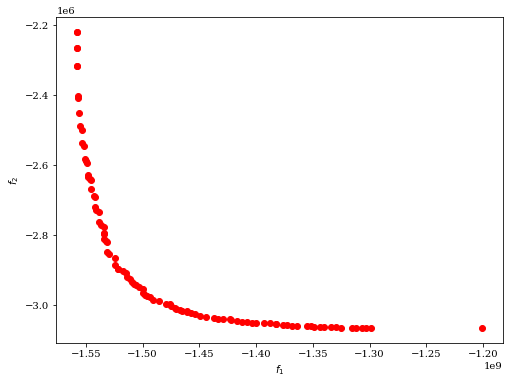

In [16]:

algorithm = NSGA2(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True)
res_NSGA2 = minimize (problem, algorithm, Termination = ("n_gen", 500), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_NSGA2.F, color="red")
plot.show()

## RNSGA2

In [22]:
%matplotlib inline

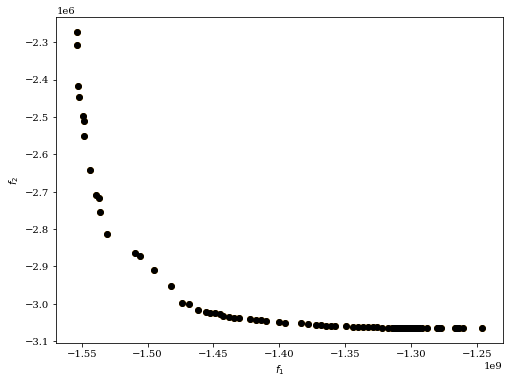

In [8]:
from pymoo.algorithms.rnsga2 import RNSGA2
from pymoo.factory import get_visualization, get_reference_directions
from pymoo.util.ref_dirs.energy import RieszEnergyReferenceDirectionFactory

ref_dennis = get_reference_directions("das-dennis", 2, n_points=5, seed=1)
ref_energy = get_reference_directions("energy", 2, 8, seed=1)

algorithm_energy = RNSGA2(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_points = ref_energy, epsilon=0.01,
                  normalization='front')
res_RNSGA2_energy = minimize (problem, algorithm_energy, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
algorithm_dennis = RNSGA2(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_points = ref_dennis, epsilon=0.01,
                  normalization='front')


res_RNSGA2_dennis = minimize (problem, algorithm_dennis, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_RNSGA2_energy.F, color="Orange")
plot.add(res_RNSGA2_dennis.F, color="black")
plot.show()

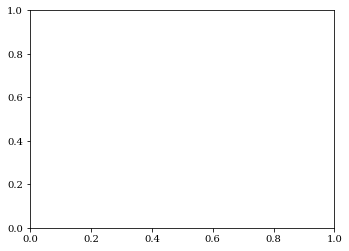

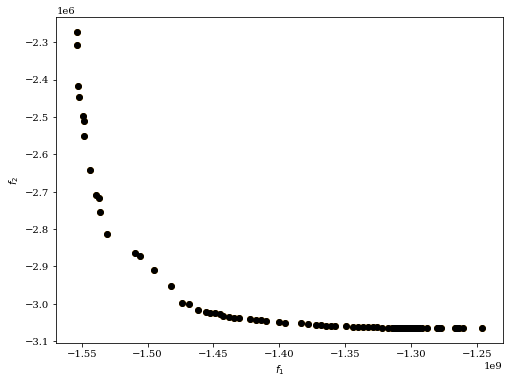

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_RNSGA2_energy.F, color="Orange")
plt.subplot(121)
plot.add(res_RNSGA2_dennis.F, color="black")
plot.show()

## NSGA3

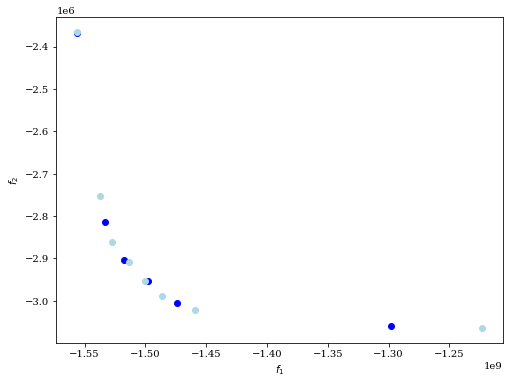

In [31]:
from pymoo.algorithms.nsga3 import NSGA3
ref_energy = get_reference_directions("energy", 2, 8, seed=1)
ref_dennis = get_reference_directions("das-dennis", 2, n_partitions=5, seed=1)
#ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=23)
algorithm_dennis = NSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_dennis,
                  normalization='front')
res_NSGA3_dennis = minimize (problem, algorithm_dennis, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
algorithm_energy = NSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_energy,
                  normalization='front')
res_NSGA3_energy = minimize (problem, algorithm_energy, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_NSGA3_dennis.F, color="blue")
plot.add(res_NSGA3_energy.F, color="lightblue")
plot.show()

## UNSGA3

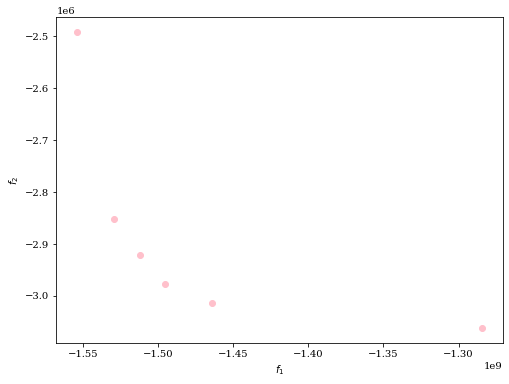

In [34]:
from pymoo.algorithms.unsga3 import UNSGA3
#ref_dirs = get_reference_directions(, 2, n_partitions=23)

algorithm = UNSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_dennis,
                  normalization='front')
res_UNSGA3 = minimize (problem, algorithm, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3.F, color="pink")
plot.show()

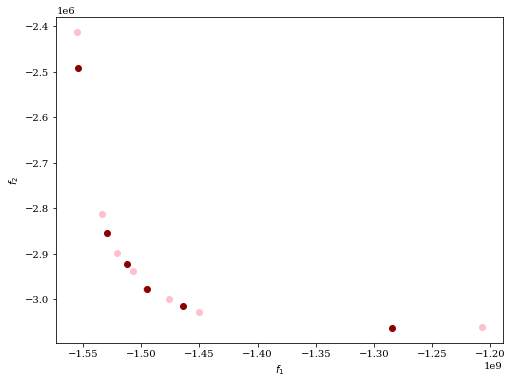

In [35]:
from pymoo.algorithms.unsga3 import UNSGA3
#ref_points = get_reference_directions("das-dennis", 2, n_partitions=90)
algorithm = UNSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_energy,
                  normalization='front')
res_UNSGA3_new = minimize (problem, algorithm, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3_new.F, color="pink")
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3.F, color="darkred")
plot.show()

## Convergency

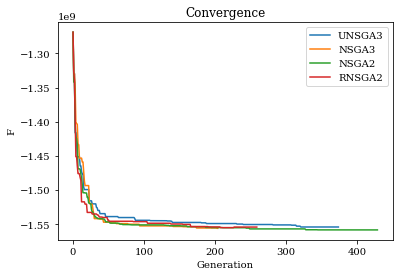

In [13]:

import matplotlib.pyplot as plt

ret_unsga3 = [np.min(e.pop.get("F")) for e in res_UNSGA3.history]
ret_NSGA3 = [np.min(e.pop.get("F")) for e in res_NSGA3.history]
ret_NSGA2 = [np.min(e.pop.get("F")) for e in res_NSGA2.history]
ret_RNSGA2 = [np.min(e.pop.get("F")) for e in res_RNSGA2.history]

plt.plot(np.arange(len(ret_unsga3)), ret_unsga3, label="UNSGA3")
plt.plot(np.arange(len(ret_NSGA3)), ret_NSGA3, label="NSGA3")
plt.plot(np.arange(len(ret_NSGA2)), ret_NSGA2, label="NSGA2")
plt.plot(np.arange(len(ret_RNSGA2)), ret_RNSGA2, label="RNSGA2")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()

## Pareto front comparison

No handles with labels found to put in legend.


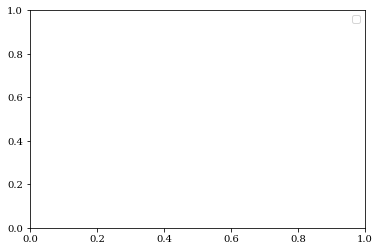

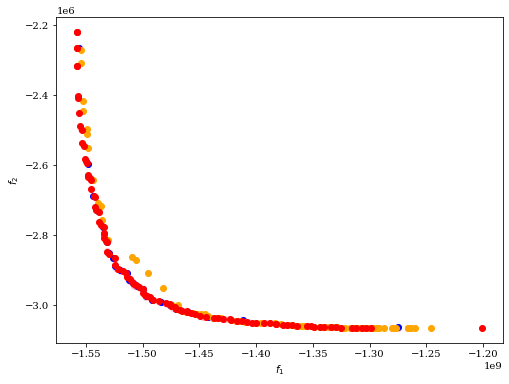

In [15]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3.F, color="pink", label="UNSGA3")
plot.add(res_NSGA3.F, color="blue", label="NSGA3")
plot.add(res_RNSGA2.F, color="Orange", label="RNSGA2")
plot.add(res_NSGA2.F, color="red", label="NSGA2")
plt.legend()
plot.show()

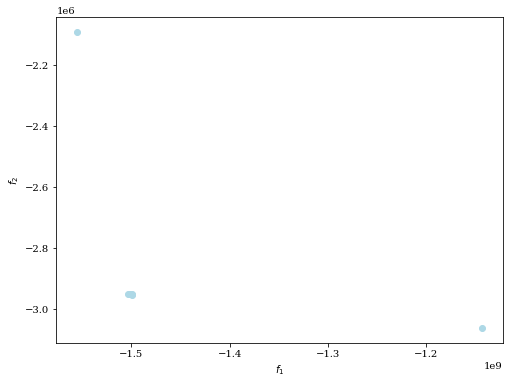

In [43]:
from pymoo.algorithms.rnsga3 import RNSGA3

# Define reference points
ref_points = get_reference_directions("das-dennis", 2, n_partitions=12)

# Get Algorithm
algorithm = RNSGA3(ref_points = ref_points, pop_per_ref_point = 100,
                   sampling=get_sampling("perm_random"),
                   crossover=get_crossover("perm_ox"),
                   mutation=get_mutation("perm_inv"),
                   eliminate_duplicates=True)
res = minimizeres_UNSGA3 = minimize (problem, algorithm, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)

reference_directions = res.algorithm.survival.ref_dirs

plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plt.add(res.F, color="lightblue")
#plt.add(ref_points)
plt.show()

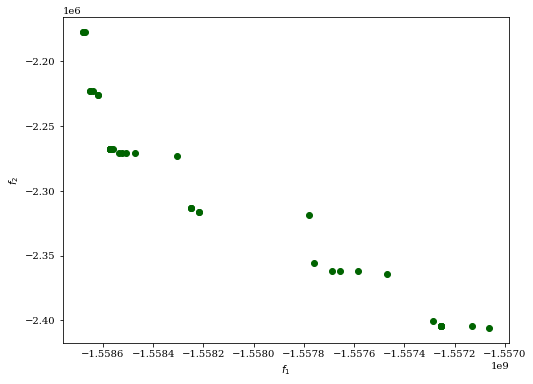

In [41]:
from pymoo.algorithms.moead import MOEAD
algorithm = MOEAD(get_reference_directions("das-dennis", 2, n_partitions=99), 
                  n_neighbors=20,
                  decomposition="pbi",
                  prob_neighbor_mating=0.7,pop_size = 100,seed=1,sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),mutation=get_mutation("perm_inv"),eliminate_duplicates=True)

res_MOEAD = minimize(problem, algorithm, termination=('n_gen', 200), verbose = False, save_history=True)
plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plt.add(res_MOEAD.F, color="darkgreen")
#plt.add(ref_points)
plt.show()

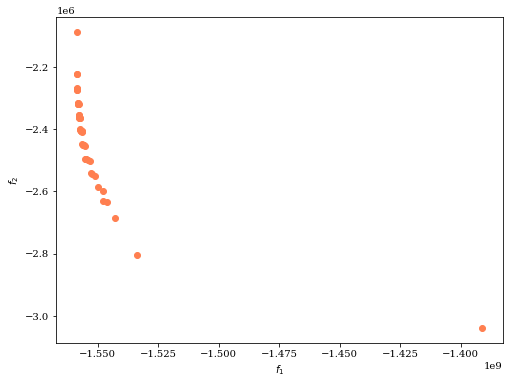

In [48]:
from pymoo.algorithms.ctaea import CTAEA

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=100)

algorithm = CTAEA(sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_dirs)
res_CTAEA = minimize(problem, algorithm, termination=('n_gen', 200), verbose = False, save_history=True)
plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plt.add(res_CTAEA.F, color="coral")
#plt.add(ref_points)
plt.show()

In [61]:
from pymoo.algorithms.so_cmaes import CMAES
from pymoo.util.normalization import denormalize

algorithm = CMAES(x0=denormalize(np.random.random(problem.n_var), problem.xl, problem.xu),
                 sigma=0.5,
                 restarts=2,
                 maxfevals=np.inf,
                 tolfun=1e-6,
                 tolx=1e-6,
                 restart_from_best=True,
                 bipop=True)
res_CMAES = minimize(problem, algorithm, termination=('n_gen', 200), verbose = False, save_history=True)
print("Best solution found: \nX = %s" % (res_CMAES.X))

Best solution found: 
X = [[ 4.92336711 22.21442317 14.31585308 ... 14.1483967  21.56462489
   1.59971203]
 [ 4.92336711 22.21442317 14.31585308 ... 14.1483967  21.56462489
   1.59971203]
 [ 5.26127367 22.06482324 14.4028412  ... 14.48769074 21.52144619
   2.00869487]
 ...
 [ 5.19365631 22.18144183 14.08330572 ... 13.61435703 22.55271907
   0.50765335]
 [ 4.32387261 22.01436921 14.39400316 ... 13.94509317 21.17589124
   2.35056236]
 [ 4.684224   22.54825408 14.10697072 ... 13.52604517 21.87645165
   1.55754106]]
